In [2]:
#import libraries
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [89]:
#import bitcoin stock data
from pathlib import Path
csvpath = Path('BTC_USD.csv', parse_dates = True, infer_datetime_format = True ,index_col="Date")
df_btc = pd.read_csv(csvpath) 
df_btc.set_index(pd.to_datetime(df_btc['Date'], infer_datetime_format=True), inplace = True)
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
df_btc=df_btc.loc['02-01-2018':'08-14-2020']
df_btc.drop(columns=['Date'], inplace = True)
df_btc.head()

,BTC,BTC_VOL,SP_500
Date,,,
2018-02-01,9171.0,9.959400e+09,2822.0
2018-02-02,8831.0,1.272690e+10,2762.0
2018-02-03,9175.0,7.263790e+09,2649.0
2018-02-04,8277.0,7.073550e+09,2695.0
2018-02-05,6955.0,9.285290e+09,2682.0


In [90]:
#import fng data;  by date
csvpath = Path("fng.csv", parse_dates= True, infer_datetime_format = True) #, index_col="date")
df_fng = pd.read_csv(csvpath)
df_fng['Date'] = pd.to_datetime(df_fng['date'])
df_fng = df_fng.drop(columns=["fng_classification","date"])
df_fng=df_fng.set_index('Date')
df_fng.sort_index()
df_fng.tail()

,fng_value
Date,
2018-02-05,11
2018-02-04,24
2018-02-03,40
2018-02-02,15
2018-02-01,30


In [91]:
#combine dataframes
#df_btc.reset_index()
#df_fng.reset_index()
combine=pd.merge(df_btc, df_fng, left_index=True, right_index=True)
combine.head()

,BTC,BTC_VOL,SP_500,fng_value
Date,,,,
2018-02-01,9171.0,9.959400e+09,2822.0,30
2018-02-02,8831.0,1.272690e+10,2762.0,15
2018-02-03,9175.0,7.263790e+09,2649.0,40
2018-02-04,8277.0,7.073550e+09,2695.0,24
2018-02-05,6955.0,9.285290e+09,2682.0,11


In [92]:
#check data frame
combine.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 923 entries, 2018-02-01 to 2020-08-14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC        922 non-null    float64
 1   BTC_VOL    922 non-null    float64
 2   SP_500     922 non-null    float64
 3   fng_value  923 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 36.1 KB


In [93]:
#check for missing values
combine.isnull().sum()

BTC          1
BTC_VOL      1
SP_500       1
fng_value    0
dtype: int64

In [94]:
#fill missing values with previous value
combine=combine.fillna(method='pad')

In [149]:
#add atual column from previous day, step -1, -2 would be 2 days
steps=-1
dataset_for_prediction= combine.copy()
dataset_for_prediction['Actual']=dataset_for_prediction['BTC'].shift(steps)
dataset_for_prediction.head(2)
##new code below
dataset_for_prediction=dataset_for_prediction.reset_index()
dataset_for_prediction.head()


,Date,BTC,BTC_VOL,SP_500,fng_value,Actual
0,2018-02-01,9171.0,9.959400e+09,2822.0,30,8831.0
1,2018-02-02,8831.0,1.272690e+10,2762.0,15,9175.0
2,2018-02-03,9175.0,7.263790e+09,2649.0,40,8277.0
3,2018-02-04,8277.0,7.073550e+09,2695.0,24,6955.0
4,2018-02-05,6955.0,9.285290e+09,2682.0,11,7754.0


In [185]:
#drop null values
dataset_for_prediction=dataset_for_prediction.dropna()

In [186]:
#create date as index
dataset_for_prediction['Date'] =pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index= dataset_for_prediction['Date']

In [187]:
#dataset_for_prediction=dataset_for_prediction.drop(columns=['Date'])
dataset_for_prediction.head(2)

,Date,BTC,BTC_VOL,SP_500,fng_value,Actual
Date,,,,,,
2018-02-01,2018-02-01,9171.0,9.959400e+09,2822.0,30,8831.0
2018-02-02,2018-02-02,8831.0,1.272690e+10,2762.0,15,9175.0


In [188]:
dataset_for_prediction.dtypes

Date         datetime64[ns]
BTC                 float64
BTC_VOL             float64
SP_500              float64
fng_value             int64
Actual              float64
dtype: object

Text(0.5, 1.0, 'BIT Coin Opening Value')

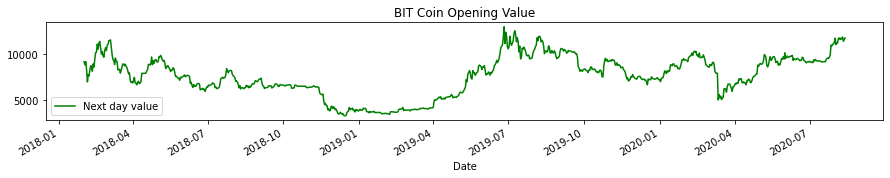

In [189]:
#plot data
dataset_for_prediction['BTC'].plot(color='green', figsize=(15,2))
plt.legend(['Next day value', 'Mean'])
plt.title('BIT Coin Opening Value')

Text(0.5, 1.0, ' BTC Volume')

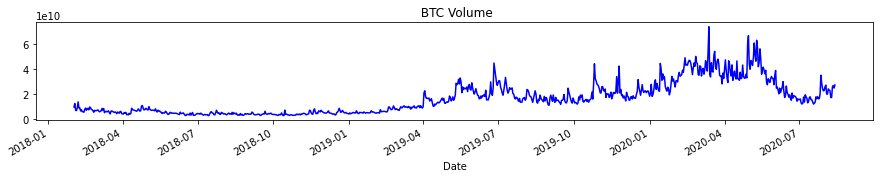

In [190]:
#plot data-volume
dataset_for_prediction['BTC_VOL'].plot(color='blue', figsize=(15,2))
plt.title(' BTC Volume')

In [191]:
#scale the input  4 features
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['BTC','BTC_VOL','SP_500','fng_value']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input


In [192]:
##scale the input  1 features
#from sklearn.preprocessing import MinMaxScaler
#sc_in = MinMaxScaler(feature_range=(0, 1))
#scaled_input = sc_in.fit_transform(dataset_for_prediction[['BTC']])
#scaled_input =pd.DataFrame(scaled_input)
#X= scaled_input

In [193]:
#scale the output features
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [194]:
#sample X data, 4 features
X.rename(columns={0:'BTC', 1:'BTC_VOL', 2:'SP_500', 3:'fng_value'}, inplace=True)
X.index=dataset_for_prediction.index #.to_period('D') 
X.head(2)

,BTC,BTC_VOL,SP_500,fng_value
Date,,,,
2018-02-01,0.606811,0.098771,0.060678,0.277778
2018-02-02,0.572042,0.137622,0.054455,0.111111


In [195]:
##sample X data, 1 features; outcome not better
#X.rename(columns={0:'BTC'}, inplace=True)
#X.index=dataset_for_prediction.index #.to_period('D') 
#X.head(2)

In [196]:
#sample of y data
y.rename(columns={0:"BIT Coin Price next day"}, inplace= True)
y.index=dataset_for_prediction.index #.to_period('D') #did not fix issue further down with surimax
y.head(2)

,BIT Coin Price next day
Date,
2018-02-01,0.572042
2018-02-02,0.607220


In [197]:
train_size=int(len(combine) *0.7)
test_size = int(len(combine)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

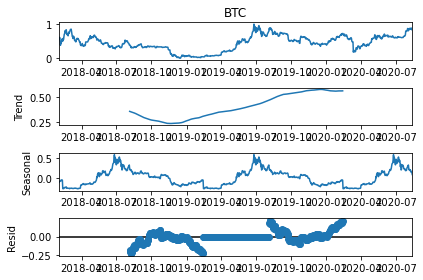

In [198]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['BTC'],model="additive",period=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [199]:
from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [200]:
y_test=y['BIT Coin Price next day'][:train_size].dropna()
test_adf(y_test, " BIT Coin Price")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for  BIT Coin Price


In [201]:
test_adf(y_test.diff(), " BIT coin Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary  BIT coin Price


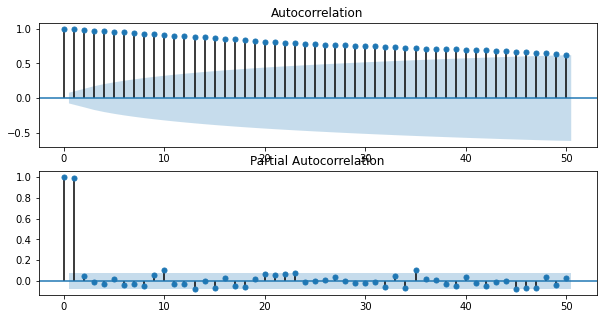

In [202]:
#build model
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

In [203]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2595.962, Time=5.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2597.081, Time=0.85 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2597.827, Time=3.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2599.423, Time=4.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2599.081, Time=1.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2596.722, Time=4.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2595.389, Time=4.92 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2601.423, Time=4.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-2597.965, Time=3.78 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2600.888, Time=3.82 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2599.827, Time=2.80 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2597.422, Time=4.88 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 43.420 seconds


In [204]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  646
Model:               SARIMAX(0, 1, 1)   Log Likelihood                1306.712
Date:                Mon, 24 Aug 2020   AIC                          -2601.423
Time:                        19:55:27   BIC                          -2574.608
Sample:                             0   HQIC                         -2591.018
                                - 646                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
BTC           -0.5428      0.111     -4.887      0.000      -0.760      -0.325
BTC_VOL       -0.0911      0.020     -4.570      0.000      -0.130      -0.052
SP_500         0.0513      0.058      0.885      0.376      -0.062       0.165
fng_value  -1.353e-05      0.008     -0.002      0.999      -0.015       0.015
ma.L1          0.5371      0.119      4.496      0.000       0.303       0.771
sigma2         0.0010   3.54e-05     28.776      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       43.16   Jarque-Bera (JB):               491.56
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.24
Prob(H) (two-sided):                  0.06   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [205]:
train_X.shape

(646, 4)

In [206]:
train_y.shape

(646, 1)

In [207]:
train_y.head(2)

,BIT Coin Price next day
Date,
2018-02-01,0.572042
2018-02-02,0.607220


In [208]:
train_X.head(2)

,BTC,BTC_VOL,SP_500,fng_value
Date,,,,
2018-02-01,0.606811,0.098771,0.060678,0.277778
2018-02-02,0.572042,0.137622,0.054455,0.111111


In [209]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_y, exog = train_X, order = (0,1,1),enforce_invertibility=False, enforce_stationarity=False)

C:\Users\alexa\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\alexa\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [210]:
#fit model
results= model.fit()

In [211]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)

C:\Users\alexa\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [212]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

C:\Users\alexa\anaconda3\envs\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [213]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

In [214]:
#predictions data frame
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['BIT Coin Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)

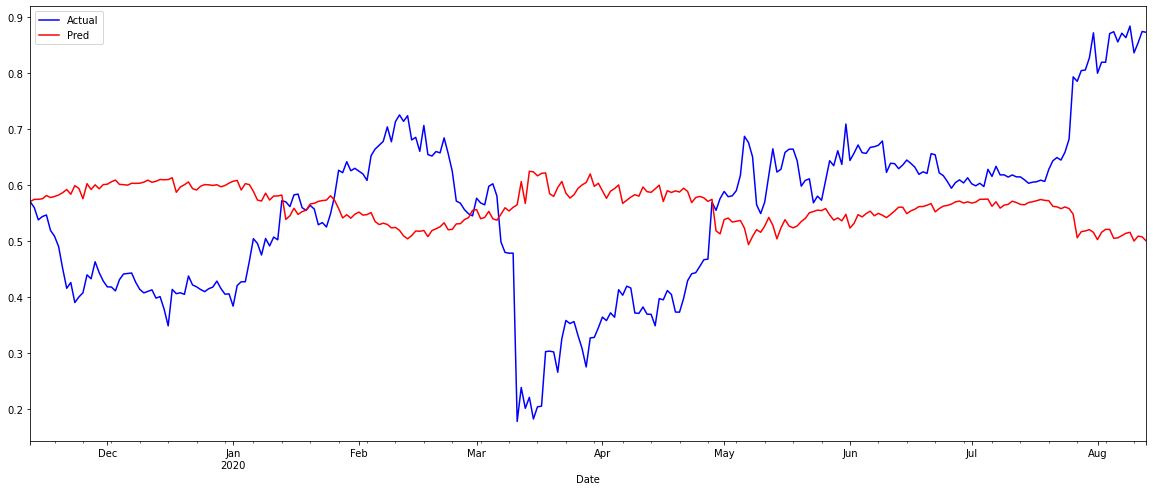

In [215]:
#plot predictions
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

In [216]:
forecast_bit= pd.DataFrame(forecast_1)
forecast_bit.reset_index(drop=True, inplace=True)
forecast_bit.index=test_X.index
forecast_bit['Actual'] =scaler_output.iloc[train_size:, 0]
forecast_bit.rename(columns={0:'Forecast'}, inplace=True)

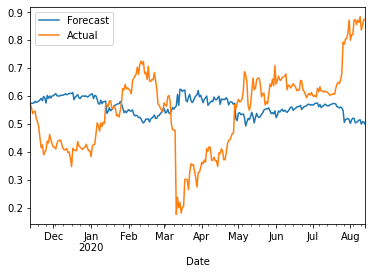

In [217]:
#plot forecast
forecast_bit['Forecast'].plot(legend=True)
forecast_bit['Actual'].plot(legend=True)


In [218]:
#evaluation of the model with root mean squared average
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['Pred'], predictions['Actual'])
error

0.1718284163037752

In [219]:
#sample forcast vs actual dataframe
forecast_bit.head()

,Forecast,Actual
Date,,
2019-11-12,0.570269,0.569690
2019-11-13,0.574042,0.559464
2019-11-14,0.574198,0.537376
2019-11-15,0.575070,0.543409
2019-11-16,0.580890,0.546170
